 <div id ="0" style="font-size:30px; color:#0d4d1e; font-weight:bold;">Municipal waste generated by countries</div>

<html> 
    <div style="font-size:22px; color:#1d7535; font-weight:bold;">Content</div>

<ol style="font-size: 16px;">
    <a href="#1" style='color:#1d7535; text-decoration:none;'><li>Introduction</li></a>
    <a href="#2" style='color:#1d7535; text-decoration:none;'><li>Data description and objectives</li></a>
    <a href="#3" style='color:#1d7535; text-decoration:none;'><li>Data manipulation and validation</li></a>
    <ol>
        <a href="#31" style='color:#1d7535; text-decoration:none;'>3.1. Data cleaning and shaping</a> <br/>
        <a href="#32" style='color:#1d7535; text-decoration:none;'>3.2. Missing values</a>
    </ol>
<a href="#4" style='color:#1d7535; text-decoration:none;'><li>Web-Scrapping for missing values</li></a>
<a href="#5" style='color:#1d7535; text-decoration:none;'><li>Data Preparation</li></a>
<a href="#6" style='color:#1d7535; text-decoration:none;'><li>Vusualisation</li></a>
    <ol>
        <a href="#61" style='color:#1d7535; text-decoration:none;'>6.1. Percentage of waste by categories in the world</a><br/>
        <a href="#62" style='color:#1d7535; text-decoration:none;'>6.2. Dependence of the Population & Total waste generated by country on its GDP</a><br/>
        <a href="#63" style='color:#1d7535; text-decoration:none;'>6.3. Dependence of the Total waste generated by country on its GDP</a><br/>
        <a href="#64" style='color:#1d7535; text-decoration:none;'>6.4. Comparing the HDI of the countries with the highest GDP</a><br/>
        <a href="#65" style='color:#1d7535; text-decoration:none;'>6.5. </a><br/>
    </ol>
<a href="#7" style='color:#1d7535; text-decoration:none;'><li>Conclusion</li></a>
</ol>
</html>

<div id="1" style="font-size: 28px; color:#47a84d; font-weight: bold; "> 
    1. Introduction <a href='#0' style="font-size:15px; color:#0d4d1e; text-decoration=none;">up</a>
</div>

The world generates millions of tonnes of solid waste every year. Out daily life consist of many things, that we eat, break, use, and then drop it out, because these items already are unnecessary and unuseful. This way humanity creates mountains of waste right behind their living places. 

Municipal waste management in the world has become more and more complex in the last decade because annually, the number of municipal solid waste is rapidly growing, but a tiny portion of it is recycled by countries. So, the aim of this project is to provide guidelines on the scope and coverage of municipal waste for municipal waste collection. 

This investigation is based on statistical data, and the project will focus on how much waste generates humanity.

(https://en.wikipedia.org/wiki/Municipal_solid_waste)

<div id="2" style="font-size: 28px; color:#47a84d; font-weight: bold; "> 
    2. Data description and objectives <a href='#0' style="font-size:15px; color:#0d4d1e; text-decoration=none;">up</a>
</div>

##### Description

Dataset, which was chosen for investigation of the topic, is about country level municipal waste, that is generated by particular country, was found on the Word Bank web-site (https://datacatalog.worldbank.org/dataset/what-waste-global-database/resource/de74cc68-e796-4e42-9793-f140719c91ac#{}). There are 271 rows, and 51 columns in total. However, for this project only necessary and meaningful columns are taken. 
Out of these 51 columns, were chosen 11 columns. 
They are: 
* Country - name of country
* GDP ($M) - GDP of this country
* Food_Organic (%) - percentage of food and organic waste
* Glass(%) - percentage of glass waste
* Metal (%) - percentage of metal waste
* Other(%) - percentage of waste, which is not belongs to any large category
* Paper (%) - percentage of paper waste
* Plastic (%) - percentage of  plastic waste
* Population (%) - number of people living in the country
* Total_Waste (tonnes) - mass of all categories of waste in tonnes
* Recycling (%) - percentage of waste that recycled

Also, there is the second dataset with the data collecten in 2020. There are information avount countries, Human Developmen Index(HDI), and population of the country. here, the HDI is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living.

https://worldpopulationreview.com/country-rankings/developed-countries

This dataset is used for taking the human development index, and then merge these two tables.

##### Objectives

1. Observe the dependence of GDP per capita on the amount of waste generated by one person
2. According to the world map, investigate which countries produce the most amount of waste
3. Consider the relationship between the GDP of the country with recycling waste in percentages
4. Investigate which category of waste (Food/Organic, Glass, Metal, Other, Paper, Plastic) is in the lead 
5. Investigate the factors that affect the production of municipal waste in countries

<div id="3" style="font-size: 28px; color:#47a84d; font-weight: bold; "> 
    3. Data manipulation and validation <a href='#0' style="font-size:15px; color:#0d4d1e; text-decoration=none;">up</a>
</div>

In [1]:
#import libraries
import pandas as pd
import requests
from matplotlib import pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
import folium as folium
import seaborn as sns
sns.set();

In [2]:
#reading a csv file
municipal = pd.read_csv('country_level_data_0.csv')
municipal

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,2.141361e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,AGO,SSF,Angola,LMC,1.030423e+11,51.800000,6.700000,4.400000,11.500000,11.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,ECS,Albania,UMC,1.347108e+10,51.400000,4.500000,4.800000,15.210000,9.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
4,AND,ECS,Andorra,HIC,3.319880e+09,31.200000,8.200000,2.600000,11.600000,35.100000,...,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,XKX,ECS,Kosovo,LMC,7.129272e+09,42.000000,6.000000,6.000000,20.000000,8.000000,...,66.43,NaN,NaN,33.57,NaN,NaN,NaN,NaN,NaN,NaN
213,YEM,MEA,"Yemen, Rep.",LIC,1.192703e+10,65.000000,1.000000,6.000000,6.000000,7.000000,...,12.00,NaN,NaN,25.00,NaN,8.0,NaN,47.0,8.0,Other
214,ZAF,SSF,South Africa,UMC,4.212087e+11,16.381655,5.200216,16.910461,45.020646,9.396918,...,72.00,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN
215,ZMB,SSF,Zambia,LMC,2.703717e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#shape of the file
municipal.shape

(217, 51)

In [4]:
#reading a csv file
developed_countries = pd.read_csv('csvData.csv')

In [5]:
developed_countries

,country,humanDevelopmentIndex,pop2020
0,Norway,0.953,5421.241
1,Switzerland,0.944,8654.622
2,Australia,0.939,25499.884
3,Ireland,0.938,4937.786
4,Germany,0.936,83783.942
...,...,...,...
186,South Sudan,0.388,11193.725
187,Central African Republic,0.367,4829.767
188,Niger,0.354,24206.644
189,Tuvalu,0.000,11.792


In [7]:
developed_countries.shape

(191, 3)

<div id="31" style="font-size: 22px; color:#47a84d; font-weight: bold; "> 
    3.1 Data Cleaning and Shaping <a href='#0' style="font-size:15px; color:#0d4d1e; text-decoration=none;">up</a>
</div>

#### Deleting unnecessary columns in the "waste" dataset

In [8]:
municipal = municipal.drop(['iso3c', 'income_id','waste_treatment_controlled_landfill_percent',
                   'waste_treatment_incineration_percent',
                   'waste_treatment_landfill_unspecified_percent',
                   'waste_treatment_open_dump_percent',
                   'waste_treatment_other_percent',
                   'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
                   'waste_treatment_unaccounted_for_percent'], 1)

In [9]:
municipal = municipal.drop(['waste_collection_coverage_total_percent_of_waste', 
                   'waste_collection_coverage_urban_percent_of_households',
                   'waste_collection_coverage_urban_percent_of_geographic_area',
                   'waste_collection_coverage_urban_percent_of_population',
                   'waste_collection_coverage_urban_percent_of_waste',
                   'waste_treatment_anaerobic_digestion_percent',
                   'waste_treatment_compost_percent',
                   'waste_treatment_waterways_marine_percent',
                   'where_where_is_this_data_measured'], 1)



In [10]:
municipal = municipal.drop(['waste_collection_coverage_rural_percent_of_geographic_area', 
                   'waste_collection_coverage_rural_percent_of_households',
                   'waste_collection_coverage_rural_percent_of_population',
                   'waste_collection_coverage_rural_percent_of_waste',
                   'waste_collection_coverage_total_percent_of_geographic_area',
                   'waste_collection_coverage_total_percent_of_households',
                   'waste_collection_coverage_total_percent_of_population'], 1)

In [11]:
municipal = municipal.drop(['special_waste_hazardous_waste_tons_year', 
                   'special_waste_e_waste_tons_year',
                   'special_waste_construction_and_demolition_waste_tons_year',
                   'other_information_summary_of_key_solid_waste_information_made_available_to_the_public'], 1)



In [12]:
municipal = municipal.drop(['region_id', 
                   'other_information_information_system_for_solid_waste_management',
                   'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
                   'other_information_national_law_governing_solid_waste_management_in_the_country',
                   'other_information_ppp_rules_and_regulations'], 1)

In [13]:
municipal = municipal.drop(['special_waste_agricultural_waste_tons_year', 
                   'special_waste_industrial_waste_tons_year',
                   'special_waste_medical_waste_tons_year'], 1)

In [14]:
municipal = municipal.drop(['composition_rubber_leather_percent', 
                   'composition_wood_percent',
                   'composition_yard_garden_green_waste_percent'], 1)

In [15]:
#showing a new shape of the table
municipal.shape

(217, 11)

#### Rename colums in appropriate way with measurements in brackets

In [16]:
municipal.columns = ["Country", "GDP ($M)", "Food_Organic (%)", "Glass (%)", "Metal (%)" , "Other (%)", "Paper (%)", "Plastic (%)",
                "Population (millions)", "Total Waste (tonnes)", "Recycling (%)"]

In [17]:
municipal

,Country,GDP ($M),Food_Organic (%),Glass (%),Metal (%),Other (%),Paper (%),Plastic (%),Population (millions),Total Waste (tonnes),Recycling (%)
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103187.00,8.813202e+04,11.0
1,Afghanistan,2.141361e+10,NaN,NaN,NaN,NaN,NaN,NaN,34656032.00,5.628525e+06,NaN
2,Angola,1.030423e+11,51.800000,6.700000,4.400000,11.500000,11.900000,13.500000,25096150.00,4.213644e+06,NaN
3,Albania,1.347108e+10,51.400000,4.500000,4.800000,15.210000,9.900000,9.600000,2880703.00,1.142964e+06,NaN
4,Andorra,3.319880e+09,31.200000,8.200000,2.600000,11.600000,35.100000,11.300000,82431.00,4.300000e+04,NaN
...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,7.129272e+09,42.000000,6.000000,6.000000,20.000000,8.000000,11.000000,1801800.00,3.190000e+05,NaN
213,"Yemen, Rep.",1.192703e+10,65.000000,1.000000,6.000000,6.000000,7.000000,10.000000,27584213.00,4.836820e+06,8.0
214,South Africa,4.212087e+11,16.381655,5.200216,16.910461,45.020646,9.396918,7.090104,51729345.36,1.845723e+07,28.0
215,Zambia,2.703717e+10,NaN,NaN,NaN,NaN,NaN,NaN,14264756.00,2.608268e+06,NaN


In [18]:
#this table save data collected in 2020
developed_countries = developed_countries[["country", "humanDevelopmentIndex"]]

In [19]:
developed_countries.columns = ['Country', 'Human Development Index']

#### Join two tables 'municipal' & 'developed_countries'

In [20]:
waste = pd.merge(left=municipal, how="left", right=developed_countries, on="Country", left_index=False)
waste

,Country,GDP ($M),Food_Organic (%),Glass (%),Metal (%),Other (%),Paper (%),Plastic (%),Population (millions),Total Waste (tonnes),Recycling (%),Human Development Index
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103187.00,8.813202e+04,11.0,NaN
1,Afghanistan,2.141361e+10,NaN,NaN,NaN,NaN,NaN,NaN,34656032.00,5.628525e+06,NaN,0.498
2,Angola,1.030423e+11,51.800000,6.700000,4.400000,11.500000,11.900000,13.500000,25096150.00,4.213644e+06,NaN,0.581
3,Albania,1.347108e+10,51.400000,4.500000,4.800000,15.210000,9.900000,9.600000,2880703.00,1.142964e+06,NaN,0.785
4,Andorra,3.319880e+09,31.200000,8.200000,2.600000,11.600000,35.100000,11.300000,82431.00,4.300000e+04,NaN,0.858
...,...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,7.129272e+09,42.000000,6.000000,6.000000,20.000000,8.000000,11.000000,1801800.00,3.190000e+05,NaN,NaN
213,"Yemen, Rep.",1.192703e+10,65.000000,1.000000,6.000000,6.000000,7.000000,10.000000,27584213.00,4.836820e+06,8.0,NaN
214,South Africa,4.212087e+11,16.381655,5.200216,16.910461,45.020646,9.396918,7.090104,51729345.36,1.845723e+07,28.0,0.699
215,Zambia,2.703717e+10,NaN,NaN,NaN,NaN,NaN,NaN,14264756.00,2.608268e+06,NaN,0.588


#### Convernt all values in a table from Scentific Notation to float

In [21]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
waste

,Country,GDP ($M),Food_Organic (%),Glass (%),Metal (%),Other (%),Paper (%),Plastic (%),Population (millions),Total Waste (tonnes),Recycling (%),Human Development Index
0,Aruba,nan,nan,nan,nan,nan,nan,nan,103187.00,88132.02,11.00,nan
1,Afghanistan,21413614653.32,nan,nan,nan,nan,nan,nan,34656032.00,5628525.37,nan,0.50
2,Angola,103042328743.66,51.80,6.70,4.40,11.50,11.90,13.50,25096150.00,4213643.58,nan,0.58
3,Albania,13471082475.18,51.40,4.50,4.80,15.21,9.90,9.60,2880703.00,1142964.00,nan,0.79
4,Andorra,3319880351.13,31.20,8.20,2.60,11.60,35.10,11.30,82431.00,43000.00,nan,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,7129271791.57,42.00,6.00,6.00,20.00,8.00,11.00,1801800.00,319000.00,nan,nan
213,"Yemen, Rep.",11927030389.45,65.00,1.00,6.00,6.00,7.00,10.00,27584213.00,4836820.00,8.00,nan
214,South Africa,421208662669.69,16.38,5.20,16.91,45.02,9.40,7.09,51729345.36,18457232.00,28.00,0.70
215,Zambia,27037168289.17,nan,nan,nan,nan,nan,nan,14264756.00,2608268.00,nan,0.59


#### Convert GDP to Millions of Dollars

In [22]:
waste['GDP ($M)'] = waste['GDP ($M)'].div(1000000000)
waste

,Country,GDP ($M),Food_Organic (%),Glass (%),Metal (%),Other (%),Paper (%),Plastic (%),Population (millions),Total Waste (tonnes),Recycling (%),Human Development Index
0,Aruba,nan,nan,nan,nan,nan,nan,nan,103187.00,88132.02,11.00,nan
1,Afghanistan,21.41,nan,nan,nan,nan,nan,nan,34656032.00,5628525.37,nan,0.50
2,Angola,103.04,51.80,6.70,4.40,11.50,11.90,13.50,25096150.00,4213643.58,nan,0.58
3,Albania,13.47,51.40,4.50,4.80,15.21,9.90,9.60,2880703.00,1142964.00,nan,0.79
4,Andorra,3.32,31.20,8.20,2.60,11.60,35.10,11.30,82431.00,43000.00,nan,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,7.13,42.00,6.00,6.00,20.00,8.00,11.00,1801800.00,319000.00,nan,nan
213,"Yemen, Rep.",11.93,65.00,1.00,6.00,6.00,7.00,10.00,27584213.00,4836820.00,8.00,nan
214,South Africa,421.21,16.38,5.20,16.91,45.02,9.40,7.09,51729345.36,18457232.00,28.00,0.70
215,Zambia,27.04,nan,nan,nan,nan,nan,nan,14264756.00,2608268.00,nan,0.59


#### Covert columns of population to millions of people

In [23]:
waste['Population (millions)'] = waste['Population (millions)'].div(1000000)

In [24]:
#round the number in order to get integer number with two zero(.00) decimal places
waste['Total Waste (tonnes)'] =  waste['Total Waste (tonnes)'].round(1)
waste

,Country,GDP ($M),Food_Organic (%),Glass (%),Metal (%),Other (%),Paper (%),Plastic (%),Population (millions),Total Waste (tonnes),Recycling (%),Human Development Index
0,Aruba,nan,nan,nan,nan,nan,nan,nan,0.10,88132.00,11.00,nan
1,Afghanistan,21.41,nan,nan,nan,nan,nan,nan,34.66,5628525.40,nan,0.50
2,Angola,103.04,51.80,6.70,4.40,11.50,11.90,13.50,25.10,4213643.60,nan,0.58
3,Albania,13.47,51.40,4.50,4.80,15.21,9.90,9.60,2.88,1142964.00,nan,0.79
4,Andorra,3.32,31.20,8.20,2.60,11.60,35.10,11.30,0.08,43000.00,nan,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,7.13,42.00,6.00,6.00,20.00,8.00,11.00,1.80,319000.00,nan,nan
213,"Yemen, Rep.",11.93,65.00,1.00,6.00,6.00,7.00,10.00,27.58,4836820.00,8.00,nan
214,South Africa,421.21,16.38,5.20,16.91,45.02,9.40,7.09,51.73,18457232.00,28.00,0.70
215,Zambia,27.04,nan,nan,nan,nan,nan,nan,14.26,2608268.00,nan,0.59


<div id="32" style="font-size: 22px; color:#47a84d; font-weight: bold; "> 
    3.2. Missing values
</div>

#### Drop rows of NaN

In [25]:
nan_df = waste[waste.isna().any(axis=1)]

waste = waste.dropna(how='all')
waste.head(70)

,Country,GDP ($M),Food_Organic (%),Glass (%),Metal (%),Other (%),Paper (%),Plastic (%),Population (millions),Total Waste (tonnes),Recycling (%),Human Development Index
0,Aruba,nan,nan,nan,nan,nan,nan,nan,0.10,88132.00,11.00,nan
1,Afghanistan,21.41,nan,nan,nan,nan,nan,nan,34.66,5628525.40,nan,0.50
2,Angola,103.04,51.80,6.70,4.40,11.50,11.90,13.50,25.10,4213643.60,nan,0.58
3,Albania,13.47,51.40,4.50,4.80,15.21,9.90,9.60,2.88,1142964.00,nan,0.79
4,Andorra,3.32,31.20,8.20,2.60,11.60,35.10,11.30,0.08,43000.00,nan,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...
65,Faeroe Islands,nan,nan,nan,nan,nan,nan,nan,0.05,61000.00,67.00,nan
66,"Micronesia, Fed. Sts.",0.30,23.83,7.07,16.73,9.32,13.30,26.17,0.10,26039.60,nan,nan
67,Gabon,18.91,nan,nan,nan,nan,nan,nan,1.09,238102.30,nan,0.70
68,United Kingdom,2757.62,16.70,2.20,3.50,28.20,18.90,20.20,65.13,31567000.00,27.25,0.92


#### Drop all records, where the percentage of waste in each category is NaN, and where country is a NaN value

In [26]:
waste = waste[waste['Food_Organic (%)'].notna()
              & waste['Glass (%)'].notna()
              & waste['Metal (%)'].notna()
              & waste['Other (%)'].notna()
              & waste['Paper (%)'].notna()
              & waste['Plastic (%)'].notna()]
waste = waste[waste['Country'].notna()]

#### Reset indeces because of deleteming missing values in the above example

In [27]:
waste = waste.reset_index(drop = True)
waste

,Country,GDP ($M),Food_Organic (%),Glass (%),Metal (%),Other (%),Paper (%),Plastic (%),Population (millions),Total Waste (tonnes),Recycling (%),Human Development Index
0,Angola,103.04,51.80,6.70,4.40,11.50,11.90,13.50,25.10,4213643.60,nan,0.58
1,Albania,13.47,51.40,4.50,4.80,15.21,9.90,9.60,2.88,1142964.00,nan,0.79
2,Andorra,3.32,31.20,8.20,2.60,11.60,35.10,11.30,0.08,43000.00,nan,0.86
3,United Arab Emirates,384.22,39.00,4.00,3.00,10.00,25.00,19.00,9.27,5413453.40,20.00,0.86
4,Argentina,447.52,38.74,3.16,1.84,15.36,13.96,14.61,42.98,17910550.00,6.00,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Samoa,0.74,42.60,2.20,8.80,19.40,7.20,13.00,0.19,27399.10,36.00,0.71
156,Kosovo,7.13,42.00,6.00,6.00,20.00,8.00,11.00,1.80,319000.00,nan,nan
157,"Yemen, Rep.",11.93,65.00,1.00,6.00,6.00,7.00,10.00,27.58,4836820.00,8.00,nan
158,South Africa,421.21,16.38,5.20,16.91,45.02,9.40,7.09,51.73,18457232.00,28.00,0.70


#### Finding indexes where GDP of a country is NaN value

In [28]:
# here we try to find all missing values in GDP column 
# in order to get its indeces for the further web-scpaping
column = pd.isna(waste['GDP ($M)'])
gdp_nan = []
for row in range(2, len(waste)):
    if column[row] == True:
        gdp_nan.insert(row, row)
print(gdp_nan)

#the result gives us an array, where country has no value for GDP

[21, 35, 36, 56, 87, 104, 119, 132, 134, 135, 151, 152]


#### Array of all countries in the WASTE tabel

In [29]:
countries = []
for row in range(len(waste)):
    countries.insert(row, waste['Country'][row])
print(countries)                 

['Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Canada', 'Switzerland', 'Chile', 'China', 'Cameroon', 'Colombia', 'Comoros', 'Costa Rica', 'Cuba', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt, Arab Rep.', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.', 'United Kingdom', 'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'Greece', 'Grenada', 'Greenland', 'Guam', 'Guyana', 'Hong Kong SAR, China', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland', 'Iran, Islamic Rep.', 'Iraq', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Cambodi

#### Retrieving and insert in the new array only those countries, where GDP value is NaN

In [30]:
countries_nan = []
for row in range(len(gdp_nan)):
    countries_nan.insert(row, countries[gdp_nan[row]])
print(countries_nan)

# here the result of countries that has no GDP values

['Bermuda', 'Cuba', 'Cayman Islands', 'Gibraltar', 'Liechtenstein', 'New Caledonia', 'French Polynesia', 'Sint Maarten (Dutch part)', 'Syrian Arab Republic', 'Turks and Caicos Islands', 'British Virgin Islands', 'Virgin Islands (U.S.)']


#### Rename countries

In [31]:
#as there are not so many countries we can see that only two countries has brackets in their names
#therefore, it is necessary to delete them
#for funther webscrapping
#because it is obvious that on the web-page the name of the country will be without any brackets
countries_nan[7] = "Sint Maarten"
countries_nan[11] = "Virgin Islands"
#Now we do not have any ambiguous country names

In [33]:
#rename in main table these countries
for i in range(len(waste)):
    if waste['Country'][i] == 'Sint Maarten (Dutch part)':
        waste['Country'][i] = countries_nan[7]    
    if waste['Country'][i] == 'Virgin Islands (U.S.)':
        waste['Country'][i] = countries_nan[11]    

<div id="4" style="font-size: 28px; color:#47a84d; font-weight: bold; "> 
    4. Web-Scraping for missing values <a href='#0' style="font-size:15px; color:#0d4d1e; text-decoration=none;">up</a>
</div>

In this step, I scrape (https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)) web-site, to find GDP of countries that have missing values (countries_nan - array, which is mentioned above). Then I want to join these two tables, if there will be the same countries.

In [34]:
#200 successful connection to this web-page
wikiGDP = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')
wikiGDP.status_code

200

In [35]:
#find table number 8 on this page (that has necessary data for this project)
soup = BeautifulSoup(wikiGDP.text, 'html.parser')
table = soup.find_all('table')[9]

In [36]:
#getting all information from this web-page where number of the table is 9
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')[9]

In [37]:
df

,Rank,Country/Territory,GDP(US$million)
0,NaN,World[25],85085189
1,1,United States,20580223
2,2,China[n 4],13608152
3,3,Japan,4971323
4,4,Germany,3949549
...,...,...,...
209,190,Marshall Islands,214
210,191,Kiribati,189
211,192,Nauru,127
212,—,Montserrat,64


In [38]:
#deleting the first record
df = df.dropna(how='any')

In [39]:
df.head()

,Rank,Country/Territory,GDP(US$million)
1,1,United States,20580223
2,2,China[n 4],13608152
3,3,Japan,4971323
4,4,Germany,3949549
5,5,United Kingdom,2855297


In [40]:
# set Rank as an index column
df = df.set_index('Rank')
df.head()

,Country/Territory,GDP(US$million)
Rank,,
1,United States,20580223
2,China[n 4],13608152
3,Japan,4971323
4,Germany,3949549
5,United Kingdom,2855297


In [41]:
#now we reseted the indeces of the dataframe, and have the same number of records as number of ranks
#exacly 213 rows and ranks
df = df.reset_index(drop = True)
df.columns = ["Country", "GDP ($M)"] #rename columns

In [42]:
#to get the same values of GDP as in 'waste' table, we divide all values in 'Country' column by 1000
#and round it to two decimal places
df["GDP ($M)"] = df["GDP ($M)"].div(1000).round(2) #convert to millions

In [43]:
#as we see Country with the index 2 has unappropriate name
df.head()

,Country,GDP ($M)
0,United States,20580.22
1,China[n 4],13608.15
2,Japan,4971.32
3,Germany,3949.55
4,United Kingdom,2855.30


In [44]:
#replace 'China[n 4]' by 'China'
df["Country"] = df["Country"].replace('China[n 4]', 'China')

In [45]:
df["Country"] = df["Country"].replace('Russia[n 4]', 'Russian Federation')

In [46]:
#now there appropriate name of the country
df.head()

,Country,GDP ($M)
0,United States,20580.22
1,China,13608.15
2,Japan,4971.32
3,Germany,3949.55
4,United Kingdom,2855.30


In [47]:
#checking GDP of sample countries (United States)
#as it seen the values in outh tables the same
df.loc[df['Country'] == 'United States', ['Country', 'GDP ($M)']]

,Country,GDP ($M)
0,United States,20580.22


In [48]:
#compate value of GDP of Japan with the value in 'waste' table
#they are the same
df.loc[df['Country'] == 'Japan', ['Country', 'GDP ($M)']]

,Country,GDP ($M)
2,Japan,4971.32


In the example above, I compared manually the value of GDP in two countries (USA and Japan),
just to be sure that GDP values are credible. By this conclusion, I can merge the Scrapped values of GDP with missing values of GDP in 'waste' table.

# !!! THE END OF THE 1st ITERATION !!!

<div id="5" style="font-size: 28px; color:#47a84d; font-weight: bold; "> 
    5. Data Preparation <a href='#0' style="font-size:15px; color:#0d4d1e; text-decoration=none;">up</a>
</div>

#### Include GDP values from DataFrame to the 'waste' table, where GDP values are missed

'countries_nan' array saves the names of countries, where the GDP values are unknown(NaN)

In [49]:
#list of countries with unknown GDP
for i in range(len(countries_nan)):
    print(countries_nan[i])

Bermuda
Cuba
Cayman Islands
Gibraltar
Liechtenstein
New Caledonia
French Polynesia
Sint Maarten
Syrian Arab Republic
Turks and Caicos Islands
British Virgin Islands
Virgin Islands


As we see there are some name of countries, where we have unnecessary brackets in their names.
To avoid any misunderstandings, when we will compare the names of countries of this array with the table we scrapped, we need to rename some of these countries.
As there is only 12 countries, we see that 8th and 12th has brackets.

In [50]:
#create an in-memory SQLite database
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)          

In [51]:
#final version of the tabel
#joined tables with the scrapped DataFrame
#so, now we inserted missed GDP values in the table by joining them up
last = pd.merge(waste, df, how='left',left_on="GDP ($M)", right_on="GDP ($M)")


In [52]:
#need to delete last column and rename the first one
last = last.rename(columns={'Country_x': 'Country'})
last = last.drop(["Country_y"], 1)

In [53]:
last.sort_values(['Country'])

,Country,GDP ($M),Food_Organic (%),Glass (%),Metal (%),Other (%),Paper (%),Plastic (%),Population (millions),Total Waste (tonnes),Recycling (%),Human Development Index
1,Albania,13.47,51.40,4.50,4.80,15.21,9.90,9.60,2.88,1142964.00,nan,0.79
43,Algeria,196.03,54.40,1.20,2.80,0.80,9.80,16.90,40.61,12378740.00,8.00,0.75
6,American Samoa,0.53,19.70,3.40,7.90,25.60,26.40,12.80,0.06,18989.50,nan,nan
2,Andorra,3.32,31.20,8.20,2.60,11.60,35.10,11.30,0.08,43000.00,nan,0.86
0,Angola,103.04,51.80,6.70,4.40,11.50,11.90,13.50,25.10,4213643.60,nan,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Vietnam,164.10,61.90,2.18,0.58,15.18,5.20,12.15,86.93,9570300.00,23.00,0.69
152,Virgin Islands,nan,46.00,7.00,7.00,12.00,15.00,13.00,0.11,146500.00,nan,nan
118,West Bank and Gaza,11.77,59.10,2.40,2.70,11.50,10.10,14.20,4.05,1387000.00,0.50,nan
157,"Yemen, Rep.",11.93,65.00,1.00,6.00,6.00,7.00,10.00,27.58,4836820.00,8.00,nan


In [54]:
last.reset_index(drop=True)

,Country,GDP ($M),Food_Organic (%),Glass (%),Metal (%),Other (%),Paper (%),Plastic (%),Population (millions),Total Waste (tonnes),Recycling (%),Human Development Index
0,Angola,103.04,51.80,6.70,4.40,11.50,11.90,13.50,25.10,4213643.60,nan,0.58
1,Albania,13.47,51.40,4.50,4.80,15.21,9.90,9.60,2.88,1142964.00,nan,0.79
2,Andorra,3.32,31.20,8.20,2.60,11.60,35.10,11.30,0.08,43000.00,nan,0.86
3,United Arab Emirates,384.22,39.00,4.00,3.00,10.00,25.00,19.00,9.27,5413453.40,20.00,0.86
4,Argentina,447.52,38.74,3.16,1.84,15.36,13.96,14.61,42.98,17910550.00,6.00,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Samoa,0.74,42.60,2.20,8.80,19.40,7.20,13.00,0.19,27399.10,36.00,0.71
156,Kosovo,7.13,42.00,6.00,6.00,20.00,8.00,11.00,1.80,319000.00,nan,nan
157,"Yemen, Rep.",11.93,65.00,1.00,6.00,6.00,7.00,10.00,27.58,4836820.00,8.00,nan
158,South Africa,421.21,16.38,5.20,16.91,45.02,9.40,7.09,51.73,18457232.00,28.00,0.70


#### Drop colums, where GDP is NaN

In [55]:
nan_dff = last[last['GDP ($M)'].notna()]

last = nan_dff.dropna(how='all')

##### Objectives

1. Investigate which category of waste (Food/Organic, Glass, Metal, Other, Paper, Plastic) is in the lead 
2. Investigate how factors (such as Population, HDI, and GDP) affect the production of municipal waste in countries
3. Consider the relationship between the GDP of the country with recycling waste in percentages
4. Observe the dependence of GDP of the country on Total amount of waste generated by its population
5. According to the world map, investigate which countries produce the most amount of waste


<div id="6" style="font-size: 28px; color:#47a84d; font-weight: bold; "> 
    6. Visualisation <a href='#0' style="font-size:15px; color:#0d4d1e; text-decoration=none;">up</a>
</div>

<div id="61" style="font-size: 22px; color:#47a84d; font-weight: bold; "> 
    6.1. Percentage of waste by categories in the world  <a href='#0' style="font-size:15px; color:#0d4d1e; text-decoration=none;">up</a>
</div>

In the cells below, some calculations are shown.
I try to calculate the sum of percentages in the columns with waste category, ehich are food_organic, glass, metal, paper, plastic, and other waste. Then to get the real percentage, I need to find the sum of all these category percentages, and make some calculations to reach the Pie Chart plot.

In [56]:
#to get the sum of percentages in each column by waste category
food_sum = last['Food_Organic (%)'].sum().round(0)
glass_sum = last['Glass (%)'].sum().round(0)
metal_sum = last['Metal (%)'].sum().round(0)
other_sum = last['Other (%)'].sum().round(0)
paper_sum = last['Paper (%)'].sum().round(0)
plastic_sum = last['Plastic (%)'].sum().round(0)
sum_all = food_sum + glass_sum + metal_sum + other_sum + paper_sum + plastic_sum;

So, we collected the data for each category. In the table each country had its own percentage for category, now we have sum of these percentages and need to convert values to fit in our new frame.

In [57]:
#finding percentage for each category to plot a pie chart
food_per = (food_sum * 100)/sum_all
glass_per = (glass_sum * 100)/sum_all
metal_per = (metal_sum * 100)/sum_all
paper_per = (paper_sum * 100)/sum_all
plastic_per = (plastic_sum * 100)/sum_all
other_per = (other_sum * 100)/sum_all

In [58]:
#creating dataframe in percetages
data_pie = pd.DataFrame.from_dict({
    'Food': [food_per],
    'Glass': [glass_per],
    'Metal': [metal_per],
    'Paper': [paper_per],
    'Plastic': [plastic_per],
    'Other': [other_per]
}, orient='index')
data_pie

,0
Food,45.43
Glass,4.80
Metal,4.34
Paper,15.22
Plastic,12.45
Other,17.75


Right in the figure below (Figure 1), the representation of the waste by categories in the whole world. This plot shows percentages of waste made by each category. So,  here we see that Foor & Organic category takes the largest percentage in the Pie Chart, which is equal to 45.4%, while the Metal category takes a tiny part equal to 4.3%. 
Second place from the bottom takes Glass, which percentage only a bit greater that percentage of Metals.

The rest of the categories(Paper, Plastic, and Other) have approximately the same percentages of waste on the planet.

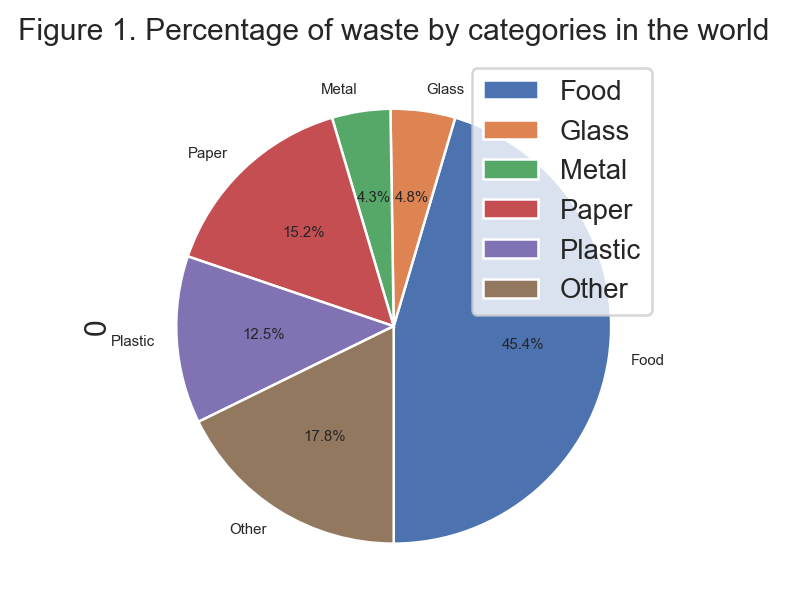

In [81]:
#according to the data above, plot a pie chart
fig = plt.figure(figsize=(4, 4), dpi=180)
ax = plt.subplot(111)
ax.set_title("Figure 1. Percentage of waste by categories in the world")  #add a title

data_pie.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=6, subplots = True)
plt.show()

<div id="62" style="font-size: 22px; color:#47a84d; font-weight: bold; "> 
    6.2. Dependence of the Population & Total waste generated by country on its GDP <a href='#0' style="font-size:15px; color:#0d4d1e; text-decoration=none;">up</a>
</div>

#### Taking a part of the sorted by GDP table - 'last' (to plot the diagrams, which are based only on the countries with the greatest GDP - top 10).

In [60]:
#sort values in the table by GDP of countries and select first 10 of them
waste_plot = last.sort_values(by='GDP ($M)', ascending=False)
waste_plot = waste_plot.head(10)

In [77]:
#taking first  countries with the greatest GDP and plot the graph to see the Population
names = waste_plot['Country']
values = waste_plot['Population (millions)']
values2 = waste_plot['Total Waste (tonnes)']

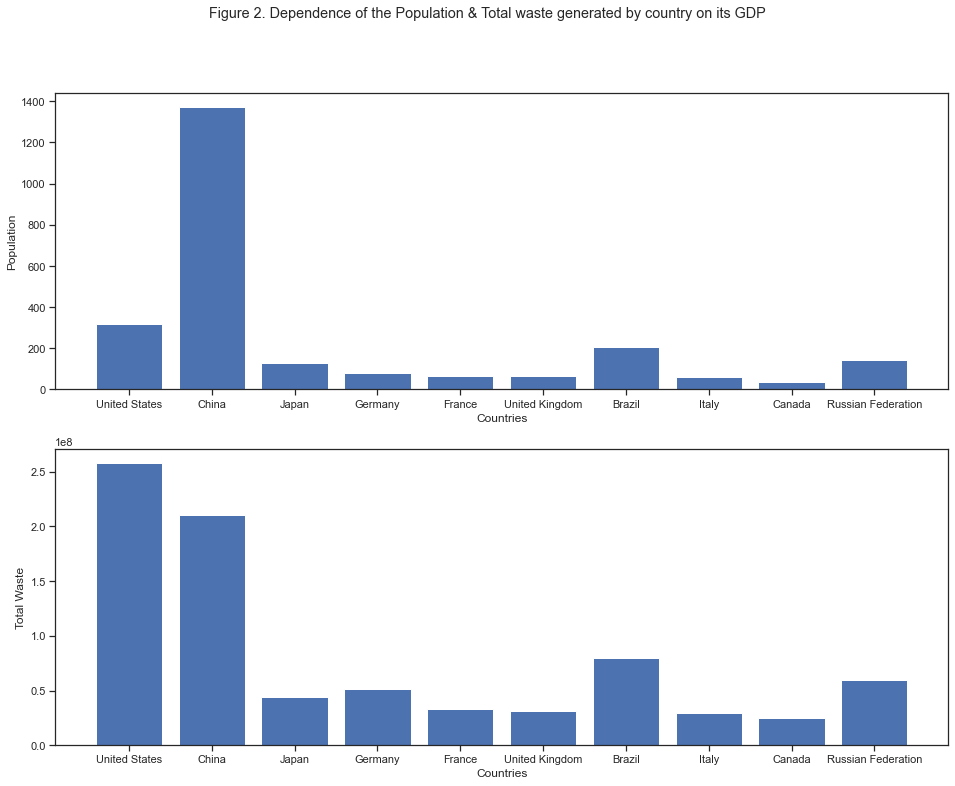

In [87]:
#space for two figures in a row
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 12))

#first plot
ax1.bar(x=names, height=values)
ax1.set_ylabel('Population')
ax1.set_xlabel('Countries')

#second plot
ax2.bar(x=names, height=values2)
ax2.set_ylabel('Total Waste')
ax2.set_xlabel('Countries')

plt.suptitle('Figure 2. Dependence of the Population & Total waste generated by country on its GDP')
plt.show()

Fugure 2 illustrates how does population and waste generated by country depend on countrie's GDP. For this observation top ten countries with the greatest GDP were taken. 

As it represented on the Bar Chart graph, The USA as a country with the largest GDP values, has approximately more than 3 times less population, comparing with China, but it produces more waste. At the same time countries that have approximately the same amount of population (Brazil, Russian Federation), produce not so many waste as USA.

Actually, USA can be taken as outliar, because the rest of 9 countries refute the linear trend. The population of these countries generate almost the same amount of municipal garbage with a direct correlation to their population.

<div id="63" style="font-size: 22px; color:#47a84d; font-weight: bold; "> 
    6.3.  Dependence of the Total waste generated by country on its GDP <a href='#0' style="font-size:15px; color:#0d4d1e; text-decoration=none;">up</a>
</div>

#### Creating the valiables, which store the GDP, population and total waste of first 10 countries sorted by GDP value

In [126]:
gdp = waste_plot['GDP ($M)']
total = waste_plot['Total Waste (tonnes)']

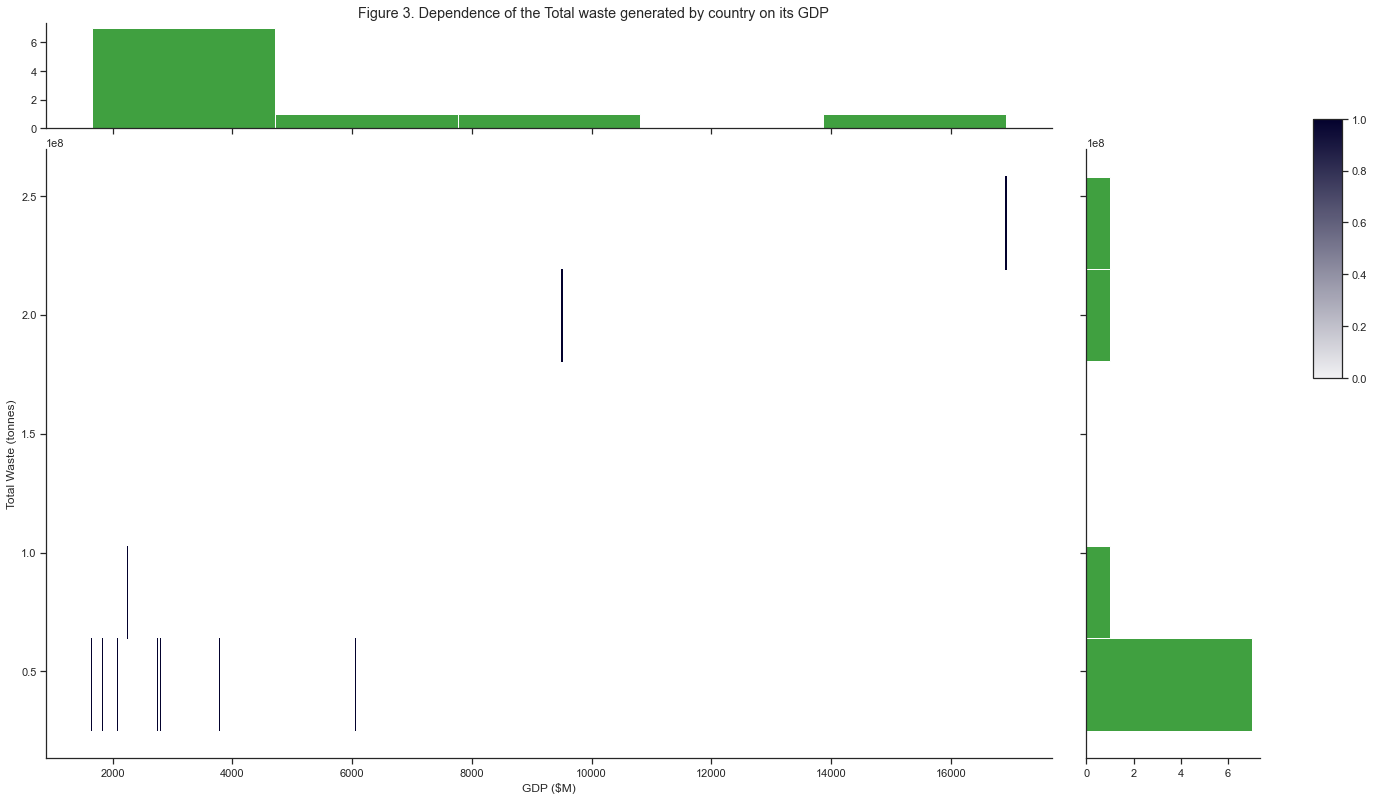

In [127]:
sns.set_theme(style="ticks")

#load waste_plot dataset (10 top by GDP)
g = sns.JointGrid(data=waste_plot, x=gdp, y=total, marginal_ticks=True)
g.fig.set_size_inches(20,12)

#set a linear scaling on the y axis
g.ax_joint.set(yscale="linear")

#create colorbar for the histogram
cax = g.fig.add_axes([1.0, .55, .02, .3])

#add the joint and plots from the sides for the histogram
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=3.9, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="bars", color="green")
plt.suptitle('Figure 3. Dependence of the Total waste generated by country on its GDP')
plt.show()

From the Figure 3 above shows the dependence of Municipal Waste on the greatest GDP of ten countries. On the purple scale on the right_hand side, we can see that the color is more intensive in the above part of graph, which means countries with largest GDP produce more amount of waste. The rest of the countries have smaller intensity located on the left-hand side of the graph (bottom), they have smaller value of GDP and produce less amount of waste.

Preparation of the data for plotting a diagramm.
Here we take 80 countries with the smallest GDP.

In [114]:
#sort values in the table by GDP of countries and select first 10 of them
waste_plot2 = last.sort_values(by='GDP ($M)', ascending=True)
waste_plot2 = waste_plot2.head(80)   

In [128]:
#collection of data about 80 countrie with the smallest gdp
gdp2 = waste_plot2['GDP ($M)']
total2 = waste_plot2['Total Waste (tonnes)']

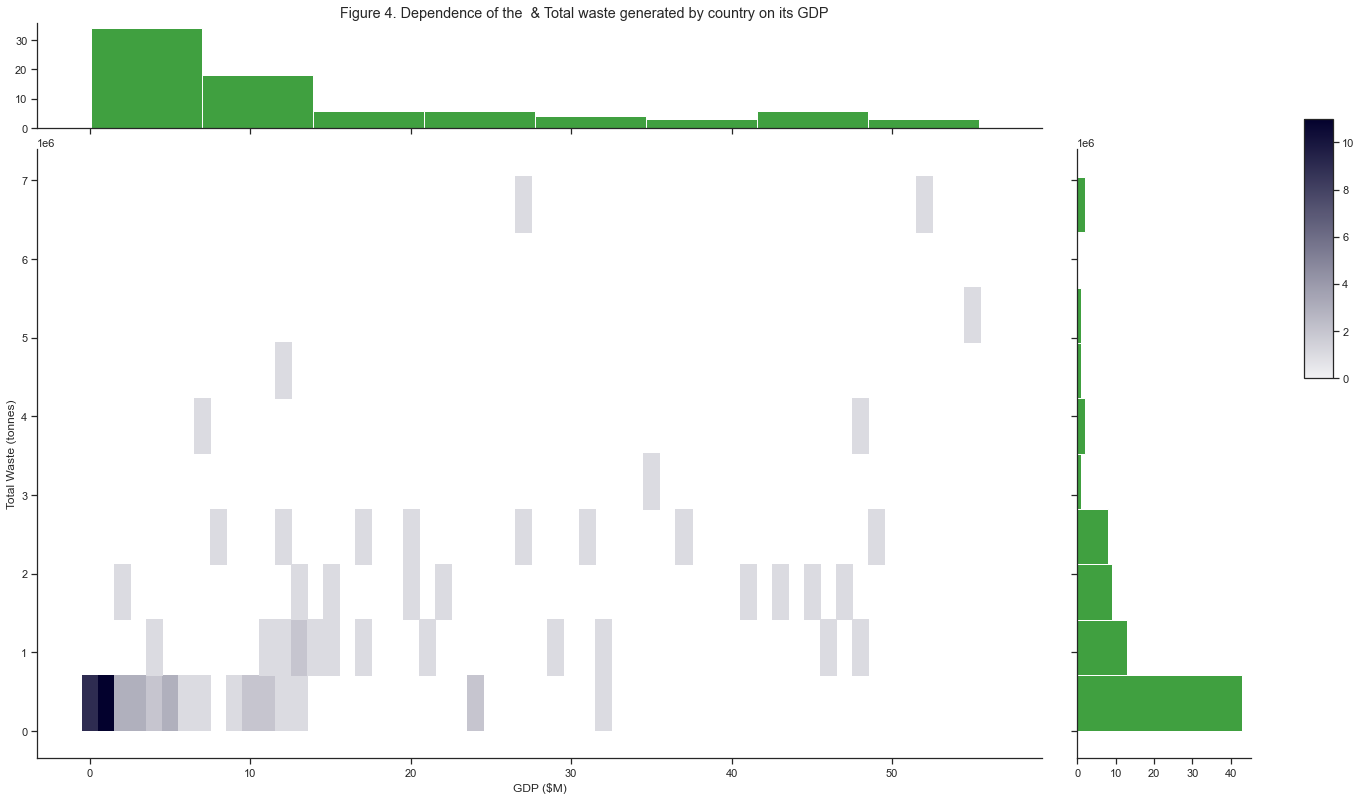

In [125]:
sns.set_theme(style="ticks")

#load waste_plot dataset (80 last by GDP)
g = sns.JointGrid(data=waste_plot2, x=gdp2, y=total2, marginal_ticks=True)
g.fig.set_size_inches(20,12)

#set a linear scaling on the y axis
g.ax_joint.set(yscale="linear")

#create colorbar for the histogram
cax = g.fig.add_axes([1.0, .55, .02, .3])

#add the joint and plots from the sides for the histogram
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=3.9, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="bars", color="green")
plt.suptitle('Figure 4. Dependence of the  & Total waste generated by country on its GDP')
plt.show()

From the graph (Figure 4) we see that there are almost all countries generate not so many garbage, the light color of the squares shows it. 

<div id="64" style="font-size: 22px; color:#47a84d; font-weight: bold; "> 
    6.4. Comparing the HDI of the countries with the highest GDP <a href='#0' style="font-size:15px; color:#0d4d1e; text-decoration=none;">up</a>
</div>

#### Taking top 5 countrie by GDP and last 5.

In [144]:
#sort values in the table by GDP of countries and select first 5 of them
waste_plot_top = last.sort_values(by='GDP ($M)', ascending=False)
waste_plot_top = waste_plot_top.head()

In [145]:
waste_plot_top

,Country,GDP ($M),Food_Organic (%),Glass (%),Metal (%),Other (%),Paper (%),Plastic (%),Population (millions),Total Waste (tonnes),Recycling (%),Human Development Index
148,United States,16920.33,14.90,4.40,9.00,3.20,26.60,12.90,318.56,258000000.00,34.60,0.92
30,China,9505.16,61.20,2.10,1.10,13.10,9.60,9.80,1371.22,210000000.00,nan,0.75
76,Japan,6052.67,36.00,5.00,4.00,6.00,33.00,11.00,127.14,43981000.00,4.90,0.91
39,Germany,3781.70,30.00,10.00,1.40,17.70,24.00,13.00,81.69,51046000.00,47.83,0.94
51,France,2806.04,32.00,10.00,3.00,26.00,20.00,9.00,66.62,33399000.00,22.26,0.90


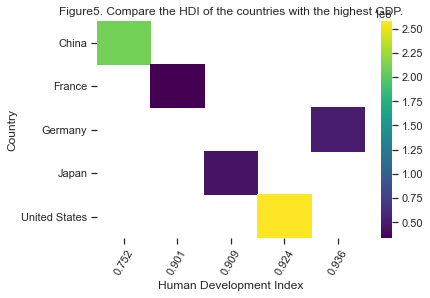

In [152]:
result = waste_plot_top.pivot(index='Country', columns='Human Development Index', values='Total Waste (tonnes)')
heatmap = sns.heatmap(result, annot=False, cmap='viridis')
plt.xticks(rotation=60)

plt.title('Figure5. Compare the HDI of the countries with the highest GDP.')
plt.show()

Compare the HDI of the countries with the highest GDP. And we see that 3 countries out of 5 have low HDI.

<div id="7" style="font-size: 28px; color:#47a84d; font-weight: bold; "> 
    7. Conclusion
</div>